In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv('twitter_data.csv')

C:\Users\mall0\AppData\Local\Temp\ipykernel_13480\783661385.py:1: DtypeWarning: Columns (0,7,8,9,10,12,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('twitter_data.csv')


In [3]:
df.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,...,Right,0,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,...,Right,0,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
2,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,...,Right,1,RightTroll,0,905874659358453760,914623490375979008,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
3,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,...,Right,0,RightTroll,0,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
4,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,...,Right,1,RightTroll,0,905874659358453760,914312219952861184,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946220 entries, 0 to 2946219
Data columns (total 21 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   external_author_id  object
 1   author              object
 2   content             object
 3   region              object
 4   language            object
 5   publish_date        object
 6   harvested_date      object
 7   following           object
 8   followers           object
 9   updates             object
 10  post_type           object
 11  account_type        object
 12  retweet             object
 13  account_category    object
 14  new_june_2018       object
 15  alt_external_id     object
 16  tweet_id            object
 17  article_url         object
 18  tco1_step1          object
 19  tco2_step1          object
 20  tco3_step1          object
dtypes: object(21)
memory usage: 472.0+ MB


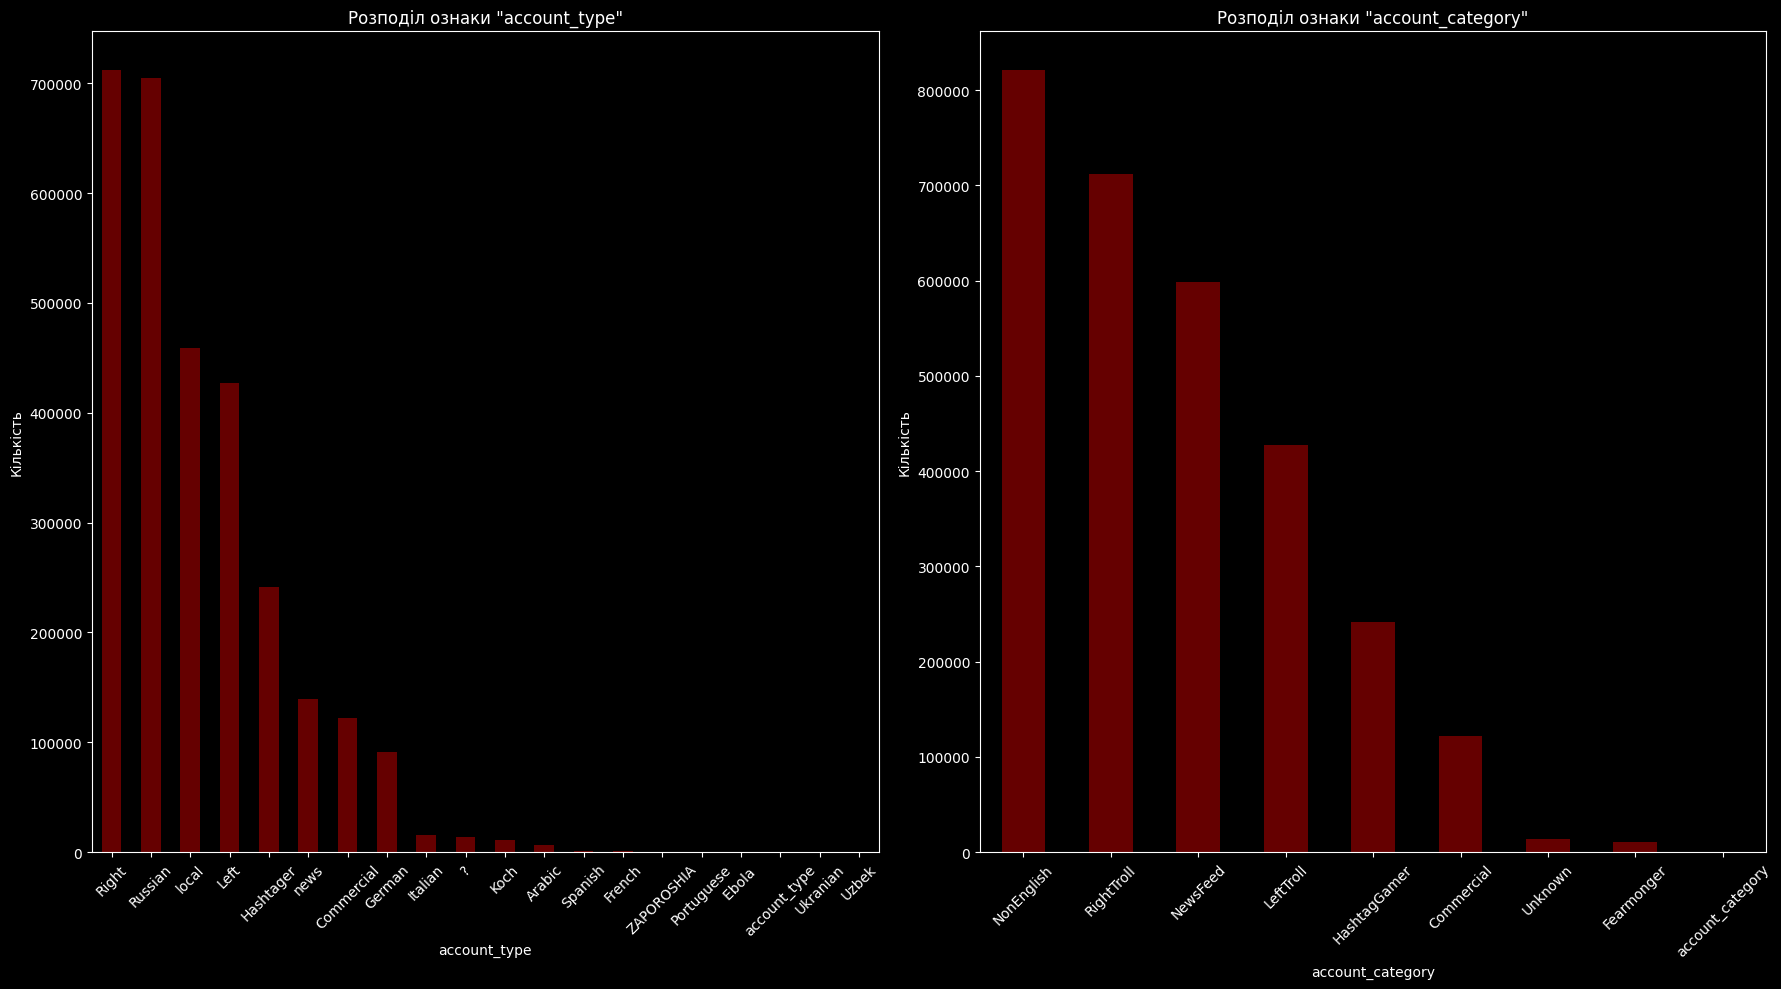

In [5]:
features = ['account_type', 'account_category']

plt.style.use('dark_background')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    df[feature].value_counts().plot(kind='bar', ax=axes[i], color='red', alpha=0.4)
    axes[i].set_title(f'Розподіл ознаки "{feature}"')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Кількість')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [6]:
df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')
df['publish_date']

0         2017-10-01 19:58:00
1         2017-10-01 22:43:00
2         2017-10-01 22:50:00
3         2017-10-01 23:52:00
4         2017-10-01 02:13:00
                  ...        
2946215   2016-02-16 22:25:00
2946216   2016-02-16 22:31:00
2946217   2016-02-16 22:35:00
2946218   2016-02-16 22:40:00
2946219                   NaT
Name: publish_date, Length: 2946220, dtype: datetime64[ns]

In [7]:
df['harvested_date'] = pd.to_datetime(df['harvested_date'], errors='coerce')
df['harvested_date']

0         2017-10-01 19:59:00
1         2017-10-01 22:43:00
2         2017-10-01 22:51:00
3         2017-10-01 23:52:00
4         2017-10-01 02:13:00
                  ...        
2946215   2016-02-16 22:25:00
2946216   2016-02-16 22:31:00
2946217   2016-02-16 22:35:00
2946218   2016-02-16 22:40:00
2946219                   NaT
Name: harvested_date, Length: 2946220, dtype: datetime64[ns]

In [8]:
for column in df.columns:
    df[column] = df[column].replace(str(column), np.nan)

In [9]:
df.isnull().sum()

external_author_id         12
author                     13
content                    14
region                   8831
language                   13
publish_date               13
harvested_date             13
following                  13
followers                  13
updates                    13
post_type             1648638
account_type               13
retweet                    13
account_category           13
new_june_2018              13
alt_external_id            13
tweet_id                   13
article_url                13
tco1_step1             845984
tco2_step1            2235103
tco3_step1            2931220
dtype: int64

In [10]:
df['post_type'] = df['post_type'].replace(np.nan, 0)
df['post_type'].unique()

array([0, 'RETWEET', 'QUOTE_TWEET'], dtype=object)

In [11]:
df['retweet'].value_counts()

retweet
0    1406210
1    1179561
0     242415
1     118021
Name: count, dtype: int64

In [12]:
for i in  df['retweet'].unique():
    print(i, type(i))

0 <class 'int'>
1 <class 'int'>
1 <class 'str'>
0 <class 'str'>
nan <class 'float'>


In [13]:
df['retweet'] = df['retweet'].replace('1', 1)
df['retweet'] = df['retweet'].replace('0', 0)
print('unique values in the retweet column:', df['retweet'].unique())
print('null values in the retweet column:', df['retweet'].isnull().sum())

unique values in the retweet column: [ 0.  1. nan]
null values in the retweet column: 13


C:\Users\mall0\AppData\Local\Temp\ipykernel_13480\658772209.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['retweet'] = df['retweet'].replace('0', 0)


In [14]:
for i in  df['new_june_2018'].unique():
    print(i, type(i))

0 <class 'int'>
1 <class 'int'>
0 <class 'str'>
1 <class 'str'>
nan <class 'float'>


In [15]:
df['new_june_2018'] = df['new_june_2018'].replace('0', 0)
df['new_june_2018'] = df['new_june_2018'].replace('1', 1)
print('unique values in the new_june_2018 column:', df['retweet'].unique())
print('null values in the new_june_2018 column:', df['retweet'].isnull().sum())

unique values in the new_june_2018 column: [ 0.  1. nan]
null values in the new_june_2018 column: 13


C:\Users\mall0\AppData\Local\Temp\ipykernel_13480\230287228.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['new_june_2018'] = df['new_june_2018'].replace('1', 1)


In [16]:
df['region'].value_counts()

region
United States                2046709
Unknown                       561994
Azerbaijan                     96333
United Arab Emirates           74675
Russian Federation             37589
Belarus                        27802
Germany                        27178
United Kingdom                 18048
Italy                          13474
Iraq                           11117
Ukraine                         5765
Malaysia                        4932
Afghanistan                     4888
Israel                          3604
France                           942
Canada                           608
Iran, Islamic Republic of        541
Spain                            515
Egypt                            232
Japan                            108
Greece                            81
Saudi Arabia                      55
Sweden                            52
Mexico                            41
Samoa                             32
India                             22
Finland                        

In [17]:
df['region'] = df['region'].replace(np.nan, 'Unknown')

In [18]:
df.isnull().sum()

external_author_id         12
author                     13
content                    14
region                      0
language                   13
publish_date               13
harvested_date             13
following                  13
followers                  13
updates                    13
post_type                   0
account_type               13
retweet                    13
account_category           13
new_june_2018              13
alt_external_id            13
tweet_id                   13
article_url                13
tco1_step1             845984
tco2_step1            2235103
tco3_step1            2931220
dtype: int64

In [19]:
df2 = df.drop(['tco1_step1', 'tco2_step1', 'tco3_step1'], axis=1)

In [20]:
df2.dropna(how='any', inplace=True)

In [21]:
df2.isnull().sum()

external_author_id    0
author                0
content               0
region                0
language              0
publish_date          0
harvested_date        0
following             0
followers             0
updates               0
post_type             0
account_type          0
retweet               0
account_category      0
new_june_2018         0
alt_external_id       0
tweet_id              0
article_url           0
dtype: int64

In [22]:
y = df2['account_category']
df2 = df2.drop(['external_author_id', 'alt_external_id', 'tweet_id', 'account_category', 'account_type', 'article_url'], axis=1)

In [23]:
num_columns = ['following', 'followers', 'updates']
cat_columns = ['author', 'region', 'language', 'retweet', 'new_june_2018', 'post_type', 'retweet']
str_columns = ['content']
date_columns = ['publish_date', 'harvested_date']

for column in num_columns:
    df2[column] = df2[column].astype('int64')
    
encoder = OrdinalEncoder()    
for column in cat_columns:
    df2[column] = encoder.fit_transform(df2[column].values.reshape(-1, 1).astype(str))
    
for column in str_columns:
    df2[column] = df2[column].astype('string')

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2946206 entries, 0 to 2946218
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   author          float64       
 1   content         string        
 2   region          float64       
 3   language        float64       
 4   publish_date    datetime64[ns]
 5   harvested_date  datetime64[ns]
 6   following       int64         
 7   followers       int64         
 8   updates         int64         
 9   post_type       float64       
 10  retweet         float64       
 11  new_june_2018   float64       
dtypes: datetime64[ns](2), float64(6), int64(3), string(1)
memory usage: 292.2 MB


In [24]:
df2.head()

,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,retweet,new_june_2018
0,0.0,"""We have a sitting Democrat US Senator on tria...",35.0,9.0,2017-10-01 19:58:00,2017-10-01 19:59:00,1052,9636,253,0.0,0.0,0.0
1,0.0,Marshawn Lynch arrives to game in anti-Trump s...,35.0,9.0,2017-10-01 22:43:00,2017-10-01 22:43:00,1054,9637,254,0.0,0.0,0.0
2,0.0,Daughter of fallen Navy Sailor delivers powerf...,35.0,9.0,2017-10-01 22:50:00,2017-10-01 22:51:00,1054,9637,255,2.0,1.0,0.0
3,0.0,JUST IN: President Trump dedicates Presidents ...,35.0,9.0,2017-10-01 23:52:00,2017-10-01 23:52:00,1062,9642,256,0.0,0.0,0.0
4,0.0,"19,000 RESPECTING our National Anthem! #StandF...",35.0,9.0,2017-10-01 02:13:00,2017-10-01 02:13:00,1050,9645,246,2.0,1.0,0.0


In [25]:
df2.shape

(2946206, 12)

In [26]:
le = LabelEncoder()
y2 = le.fit_transform(y)
x = df2.drop(['content', 'publish_date', 'harvested_date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y2, test_size=0.3, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9983130850743668


In [27]:
pd.Series(le.inverse_transform(y2)).unique()

array(['RightTroll', 'NonEnglish', 'Fearmonger', 'LeftTroll', 'Unknown',
       'HashtagGamer', 'NewsFeed', 'Commercial'], dtype=object)

In [28]:
df_prepared = df2
df_prepared['account_category'] = y
df_prepared.to_csv('twitter_data_prepared.csv', index=False)